# Financial Engineering using RNN:
### Forecasting Google Stock Prices using LSTM

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # using 1:2 instead of 1 to generate numpy array, because neural networks use numpy array

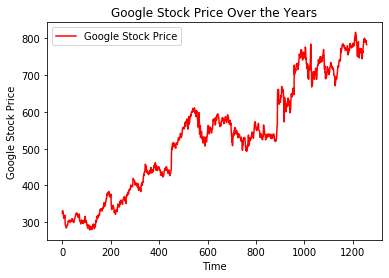

In [25]:
# visualizing the stock price movement
plt.plot(dataset_train['Open'], color = 'red', label = 'Google Stock Price')
plt.title('Google Stock Price Over the Years')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [12]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) # fit calculates min and transform applies that on all values

In [7]:
# Creating a data structure with 60 timesteps and 1 output (looking at past 3 months to learn and predict price on 61st day)
X_train = []
y_train = []
for i in range(60, 1258): # number of values in the data set
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using Theano backend.


In [11]:
# Initialising the RNN
regressor = Sequential() # creating sequence of layers

In [13]:
# Adding the first LSTM layer and some Dropout regularisation

# return_sequences is set to True to make stacked LSTM with many layers. Default is False
# units - number of neurons in the layer. Has to be high since learnig stock price is complex (provide high dimensionality)
# dropout regularization is doneto prevent overfitting - drop 20% of neurons of LSTM layer in each iteration of the training

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True)) # inpur shape not required here in anymore, since already added before
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1)) # dense class is used to make full connection to 4th layer' units = neurons = 1, since only predicted stock price is th output

In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # adam is powerful, and performs powerful weight. Other is RMSprop, which is good for RNN

In [15]:
# Fitting the RNN to the Training set

# epochs - number of times of forward and backward propagation - done in batch size of 32, not after each stock price; gives good convergence

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32) 

C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.p

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0544
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 9s 8ms/step - lo

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014


In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # not use fit because we want to use same scaling as on train set
X_test = []
for i in range(60, 80): # getting for next 20 days
    X_test.append(inputs[i-60:i, 0]) 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # to reverse the scaling of stock price

C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\iamak\Anaconda3\envs\deeplearning\lib\site-packages\theano\scan_module\scan_perform_ext.p

### The model cannot react to fast non-linear changes in stock price. According to Brownian Motion mathematical concept in Financial Engineering, the future stock price variations are independent of the past. 

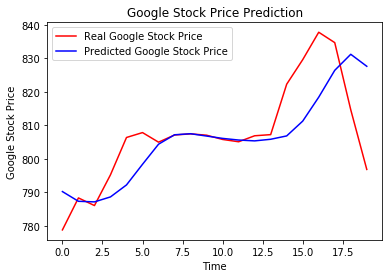

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [19]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [21]:
predicted_stock_price

array([[790.2539 ],
       [787.35376],
       [787.17615],
       [788.6619 ],
       [792.2383 ],
       [798.3939 ],
       [804.3915 ],
       [807.20734],
       [807.5207 ],
       [806.826  ],
       [806.1278 ],
       [805.6351 ],
       [805.385  ],
       [805.8656 ],
       [806.8656 ],
       [811.28156],
       [818.43054],
       [826.43976],
       [831.2321 ],
       [827.6475 ]], dtype=float32)

In [30]:
# calculating RMSE to check for closeness of fit. Otherwise the trend is more important, rather than actual predictions
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse/800

0.014558363463475865

### To improve the model:
#### 1) add more data
#### 2) add more layers
#### 3) add more neurons
#### 4) add more predictors, for ex. some other stock price which is correlated with Google's stock price
#### 5) increasing number of timesteps from 60 to more...